In [2]:
import numpy as np
import numpy.random as random
import scipy as sp
from pandas import Series, DataFrame
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

import sklearn

%precision 3

'%.3f'

In [3]:
import requests
import io

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'
res = requests.get(url).content

auto = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)
auto.columns = ['symbling','normalized-losses','make','fuel-type','aspiration','num-of-doors',
               'body-style','drive-wheels','engine-location','wheel-base','length','width','height',
               'curb-weight','engine-type','num-of-cylinders','engine-size','fuel-system','bore',
               'stroke','compression-ration','horsepower','peak-rpm','city-mpg','highway-mpg','price']
auto

,symbling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ration,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845
201,-1,95,volvo,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045
202,-1,95,volvo,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485
203,-1,95,volvo,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470


In [218]:
auto['price'].unique()


array(['13495', '16500', '13950', '17450', '15250', '17710', '18920',
       '23875', '?', '16430', '16925', '20970', '21105', '24565', '30760',
       '41315', '36880', '5151', '6295', '6575', '5572', '6377', '7957',
       '6229', '6692', '7609', '8558', '8921', '12964', '6479', '6855',
       '5399', '6529', '7129', '7295', '7895', '9095', '8845', '10295',
       '12945', '10345', '6785', '11048', '32250', '35550', '36000',
       '5195', '6095', '6795', '6695', '7395', '10945', '11845', '13645',
       '15645', '8495', '10595', '10245', '10795', '11245', '18280',
       '18344', '25552', '28248', '28176', '31600', '34184', '35056',
       '40960', '45400', '16503', '5389', '6189', '6669', '7689', '9959',
       '8499', '12629', '14869', '14489', '6989', '8189', '9279', '5499',
       '7099', '6649', '6849', '7349', '7299', '7799', '7499', '7999',
       '8249', '8949', '9549', '13499', '14399', '17199', '19699',
       '18399', '11900', '13200', '12440', '13860', '15580', '16900',


In [16]:
print(f"自動車データの形式：{auto.shape}")

自動車データの形式：(205, 26)


In [19]:
auto.head()

,symbling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ration,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [25]:
auto2 = auto[['price','horsepower','width','height']]
auto2.isin(['?']).sum()

price         4
horsepower    2
width         0
height        0
dtype: int64

In [37]:
auto3 = auto2.replace('?',np.nan).dropna()
auto3.isin(['?']).sum()
auto3.shape

(199, 4)

In [34]:
print (f"データの型確認:\n{auto3.dtypes}")

データの型確認:
price          object
horsepower     object
width         float64
height        float64
dtype: object


In [42]:
auto3 = auto3.assign(price=pd.to_numeric(auto3.price))
auto3 = auto3.assign(horsepower = pd.to_numeric(auto3.horsepower))
#assign()は既存の列は上書き、なければ新規列追加になる

In [46]:
auto3.corr()
#重回帰分析をするときに相関が高い変数を同時に重回帰の説明変数とすると、多重共有性が生じる可能性がある。
#多重共有性とは変数間の高い相関のために、回帰係数の分散が大きくなり、係数の優位性が失われてしまう現象
#今回の場合は、horsepowerとwidthga0.6程度と相関が高い

,price,horsepower,width,height
price,1.000000,0.810533,0.753871,0.134990
horsepower,0.810533,1.000000,0.615315,-0.087407
width,0.753871,0.615315,1.000000,0.309223
height,0.134990,-0.087407,0.309223,1.000000


In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = auto3.drop('price',axis=1)
y = auto3['price']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state = 0)

model = LinearRegression()
model.fit(X_train,y_train)

print (f"{model.score(X_train,y_train)}")
print (f"{model.score(X_test,y_test)}")

print(f"{pd.Series(model.coef_,index=X.columns)}")
print(f"{model.intercept_}")


0.7333575683901379
0.7370688738125762
horsepower      81.651078
width         1829.174506
height         229.510077
dtype: float64
-128409.0463033857


In [128]:
auto5 = auto[['price','length','engine-size']]
auto5 = auto5.replace('?',np.nan).dropna()
auto5['price'] = auto5.assign(price=pd.to_numeric(auto5.price))
print (f"データの型確認:\n{auto5.dtypes}")
print (f"NAデータ有無確認：{auto5.isna().sum().sum()}")

データの型確認:
price          float64
length         float64
engine-size      int64
dtype: object
NAデータ有無確認：0


In [86]:
#多重共有性確認
auto5.corr()

,price,length,engine-size
price,1.000000,0.690628,0.872335
length,0.690628,1.000000,0.685025
engine-size,0.872335,0.685025,1.000000


In [102]:
#説明変数と目的変数を分離
x = auto5.drop('price',axis=1)
y = auto5['price']
#テストデータと教師データに分離
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state = 0)

#教師データで重回帰分析を実施
model = LinearRegression()
model.fit(X_train,y_train)

#学習データでのスコアとテストデータでのスコアを確認
print (f"{model.score(X_train,y_train)}")
print (f"{model.score(X_test,y_test)}")

#回帰係数と切片を表示
print(f"回帰係数:\n{pd.Series(model.coef_,index=x.columns)}")
print(f"切片：{model.intercept_}")

0.7707363714074535
0.7634186755543846
回帰係数:
length         179.544547
engine-size    120.273905
dtype: float64
切片：-33590.41099160758


In [117]:
auto6 = auto[['price','num-of-doors','body-style']]
auto6 = auto6.replace('?',np.nan).dropna()
auto6['num-of-doors'] = auto6['num-of-doors'].replace('two',2).replace('four',4)
auto6['price'] = auto6.assign(price=pd.to_numeric(auto6.price))
print (f"データの型確認:\n{auto6.dtypes}")
#print (f"NAデータ有無確認：{auto6.isna().sum().sum()}")

データの型確認:
price           object
num-of-doors     int64
body-style      object
dtype: object


In [230]:
auto6 = auto[['price','num-of-doors','body-style']]
auto6 = auto6.replace('?',np.nan).dropna()
#auto6['price'].unique()
auto6['price'] = auto6.assign(price=pd.to_numeric(auto6.price))
#price=pd.to_numeric(auto6.price)
print(f"{price.dtypes}")
auto6['price'] = price
print (f"{auto6.dtypes}")
print (f"{auto6['price'].unique()}")

int64
price            int64
num-of-doors    object
body-style      object
dtype: object
[13495 16500 13950 17450 15250 17710 18920 23875 16430 16925 20970 21105
 24565 30760 41315 36880  5151  6295  6575  5572  6377  7957  6229  6692
  7609  8921 12964  6479  6855  5399  6529  7129  7295  7895  9095  8845
 10295 12945 10345  6785 11048 32250 35550 36000  5195  6095  6795  6695
  7395 10945 11845 13645 15645  8495 10595 10245 11245 18280 18344 25552
 28248 28176 31600 34184 35056 40960 45400 16503  5389  6189  6669  7689
  9959  8499 12629 14869 14489  6989  8189  9279  5499  7099  6649  6849
  7349  7299  7799  7499  7999  8249  8949  9549 13499 14399 17199 19699
 18399 11900 13200 12440 13860 15580 16900 16695 17075 16630 17950 18150
 12764 22018 32528 34028 37028  9295  9895 11850 12170 15040 15510 18620
  5118  7053  7603  7126  7775  9960  9233 11259  7463 10198  8013 11694
  5348  6338  6488  6918  7898  8778  6938  7198  7788  7738  8358  9258
  8058  8238  9298  9538  8449  963

In [216]:
auto6 = auto[['price','num-of-doors','body-style']]
#auto6 = auto[['price','length','engine-size']]
auto6 = auto6.replace('?',np.nan).dropna()
#errors = raise:エラーを返す,coerce:例外データをNaN,ignore:無視して変換する
auto6['num-of-doors'] = auto6['num-of-doors'].replace('two',2).replace('four',4)
auto6['price'] = auto6.assign(price=pd.to_numeric(auto6.price,errors='ignore'))
auto6['price'] = auto6.assign(price=pd.to_numeric(auto6.price))


print (f"データの型確認:\n{auto6.dtypes}")
print (f"NAデータ有無確認：{auto6.isna().sum().sum()}")
auto6['price'].unique()



データの型確認:
price           object
num-of-doors     int64
body-style      object
dtype: object
NAデータ有無確認：0


array([13495, 16500, 13950, 17450, 15250, 17710, 18920, 23875, 16430,
       16925, 20970, 21105, 24565, 30760, 41315, 36880, 5151, 6295, 6575,
       5572, 6377, 7957, 6229, 6692, 7609, 8921, 12964, 6479, 6855, 5399,
       6529, 7129, 7295, 7895, 9095, 8845, 10295, 12945, 10345, 6785,
       11048, 32250, 35550, 36000, 5195, 6095, 6795, 6695, 7395, 10945,
       11845, 13645, 15645, 8495, 10595, 10245, 11245, 18280, 18344,
       25552, 28248, 28176, 31600, 34184, 35056, 40960, 45400, 16503,
       5389, 6189, 6669, 7689, 9959, 8499, 12629, 14869, 14489, 6989,
       8189, 9279, 5499, 7099, 6649, 6849, 7349, 7299, 7799, 7499, 7999,
       8249, 8949, 9549, 13499, 14399, 17199, 19699, 18399, 11900, 13200,
       12440, 13860, 15580, 16900, 16695, 17075, 16630, 17950, 18150,
       12764, 22018, 32528, 34028, 37028, 9295, 9895, 11850, 12170, 15040,
       15510, 18620, 5118, 7053, 7603, 7126, 7775, 9960, 9233, 11259,
       7463, 10198, 8013, 11694, 5348, 6338, 6488, 6918, 7898, 8778, 

In [213]:
auto6['body-style'].unique()

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [229]:
auto6 = auto[['price','num-of-doors','body-style']]
auto6['price'].replace('?',np.nan)
auto6['price'].unique()
pd.to_numeric(auto6.price)

ValueError: Unable to parse string "?" at position 9

In [233]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
res = requests.get(url).content

adult = pd.read_csv(io.StringIO(res.decode('utf-8')),header=None)
adult.columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','occupation','relationship','race','sex','capital-gain','capital-loss','native-country','flg-50K']



In [235]:
print (f"データの形式{adult.shape}")

データの形式(32561, 15)


In [240]:
print(f"欠損の数{adult.isna().sum().sum()}")
print(f"欠損の数{adult.isnull().sum().sum()}")
#isnaとisnullは全く同じ isna()推奨
adult.head()

欠損の数0
欠損の数0


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [246]:
adult.groupby('flg-50K')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,occupation,relationship,race,sex,capital-gain,capital-loss,native-country,flg-50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


In [256]:


adult['fin_flg'] = adult['flg-50K'].map(lambda x:1 if x == ' >50K' else 0)
print(f"{adult.groupby('fin_flg').size()}")

fin_flg
0    24720
1     7841
dtype: int64


In [287]:
map(adult['flg-50K'],lambda x:1 if x == ' >50K' else 0)

TypeError: 'function' object is not iterable

In [258]:
adult.groupby('flg-50K').size()

flg-50K
 <=50K    24720
 >50K      7841
dtype: int64

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

x = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult[['fin_flg']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state = 0)
model = LogisticRegression()
model.fit(x_train,y_train)

print(f"{model.score(x_train,y_train):.3f}")
print(f"{model.score(x_test,y_test):.3f}")

0.764
0.759


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [274]:
model.coef_

array([[-3.673e-03, -3.797e-06, -8.649e-04,  6.167e-04, -5.285e-03]])

In [290]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult['fin_flg']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state = 0)

#標準化処理（各値から平均値を引いて、標準偏差で割ることで変数間の単位が消えて数値の大小が意味するところが合致する）
sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

model = LogisticRegression()
model.fit(x_train_std,y_train)

print(f"{model.score(x_train_std,y_train,):.3f}")
print(f"{model.score(x_test_std,y_test,):.3f}")

0.794
0.791


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [280]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


x = adult[['age','fnlwgt','education-num','capital-gain','capital-loss']]
y = adult[['fin_flg']]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state = 0)
model = LogisticRegression()
model.fit(x_train,y_train)

print(f"{model.score(x_train,y_train):.3f}")
print(f"{model.score(x_test,y_test):.3f}")

0.764
0.759


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [283]:
from sklearn.datasets import load_breast_cancer

x = load_breast_cancer()
x

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [6]:
auto.head()

,symbling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ration,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [22]:
auto2 = auto[['price','horsepower','width','height']]
auto2.head()
auto2 = auto2.replace('?',np.nan).dropna()



Chapter1-2_basic_of_python.ipynb
Chapter2-2_Basic_of_Numpy.ipynb
Chapter2-3_basic_of_Scipy.ipynb
Chapter2-4_basic_of_Pandas.ipynb
Chapter2-5_basic_of_Matplotlib.ipynb
Chapter3-1_Type_of_StatisticalAnalysis.ipynb
Chapter3-4_.ipynb
Chapter4_basic_of_probability_and_statistics.ipynb
Chapter5-1.ipynb
Chapter6-4.ipynb
Chapter6.ipynb
Chapter7.ipynb
Chapter8.ipynb
Untitled.ipynb
Untitled1.ipynb
agaricus-lapiota.data
chap3/
chap3-1/
chapter7/
chapter8/
imports-85.data
practice1-1.py
practice1-2.py
practice_total_1-1.py
practice_total_1-2.py
readme.txt


In [36]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = auto2.drop('price',axis=1)
y = auto2['price']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.5,random_state=0)
linear = LinearRegression()
ridge = Ridge(random_state = 0)

for model in [linear,ridge]:
    model.fit(x_train,y_train)
    print(f"{model.__class__.__name__}(traing)\t{model.score(x_train,y_train):.6f}")
    print(f"{model.__class__.__name__}(test)\t{model.score(x_test,y_test):.6f}")
    

LinearRegression(traing)	0.733358
LinearRegression(test)	0.737069
Ridge(traing)	0.733355
Ridge(test)	0.737768


In [39]:
mushroom = pd.read_csv('agaricus-lapiota.data',header=None)
mushroom.columns = ['classes','cap_shape','cap_surgace','cap_color','odor','bruises',
                    'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
                    'stalk_root','stark_surface_above_ring','stalk_surface_below_ring',
                    'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
                    'ring_number','ring_type','spore_print_color','population','habitat']


In [42]:
mushroom.head()

,classes,cap_shape,cap_surgace,cap_color,odor,bruises,gill_attachment,gill_spacing,gill_size,gill_color,...,stalk_surface_below_ring,stalk_color_above_ring,stalk_color_below_ring,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [45]:
print (f"{mushroom.shape}")
print (f"{mushroom.isnull().sum().sum()}")

(8124, 23)
0


In [51]:
mushroom[['gill_color','gill_attachment','odor','cap_color']].head()

,gill_color,gill_attachment,odor,cap_color
0,k,f,t,n
1,k,f,t,y
2,n,f,t,w
3,n,f,t,w
4,k,f,f,g


In [52]:
mushroom_dummy = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color']])
mushroom_dummy.head()

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_b,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [57]:
mushroom_dummy['flg'] = mushroom['classes'].map(lambda x:1 if x == 'p' else 0)

In [59]:
mushroom_dummy

,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,cap_color_c,cap_color_e,cap_color_g,cap_color_n,cap_color_p,cap_color_r,cap_color_u,cap_color_w,cap_color_y,flg
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8120,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8121,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8122,1,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [61]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [64]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [73]:
p1 = 0.0001
p2 = 1 - p1
p = [p1,p2]
def func1(p):
    h = 0
    for i in p :
        h += i*np.log2(i)
    h = h * -1.0
    print (f"H(S) = {h:.9f}")

In [77]:
p1 = 0.0001
p = [p1,1-p1]
func1(p)

H(S) = 0.001473034


In [123]:
def func2(p):
    if p == 0:
        return - ((1-p)*np.log2(1-p))
    if p == 1:
        return - (p * np.log2(p))
    else:
        return - (p * np.log2(p) + (1-p)*np.log2(1-p))

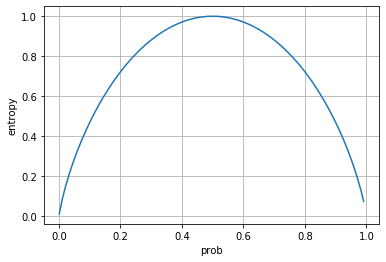

In [86]:
p = np.arange(0.001,0.999,0.01)
plt.plot(p,func2(p))
plt.xlabel('prob')
plt.ylabel('entropy')
plt.grid(True)

In [91]:
mushroom_dummy.groupby(['cap_color_c','flg'])['flg'].count().unstack()

flg,0,1
cap_color_c,,
0,4176,3904
1,32,12


In [96]:
p1 = 4176/(4176 + 3904)
print (f"Entropy:{func2(p1):.6f}")

Entropy:0.999182


In [98]:
p2 = 32/(32 + 12)
print (f"Entropy:{func2(p2):.6f}")

Entropy:0.845351


In [102]:
entropy_after = ((4176 + 3904)/8124 * func2(p1) + (32+12)/8124 * func2(p2))
print (f"{entropy_after:.6f}")

0.998349


In [105]:
mushroom_dummy.groupby(['gill_color_b','flg'])['flg'].count().unstack()

flg,0,1
gill_color_b,,
0,4208.0,2188.0
1,NaN,1728.0


In [111]:
p3 = 4208/(4208 + 2188)
p4 = 0 / (1728)
print (f"{func2(p3):.6f}")
print (f"{func2(p4):.6f}")

entropy_after2 = (4208 +2188)/8124 * func2(p3) + (0 + 1728)/8124 * func2(p4)
print (f"{entropy_after2:.6f}")

0.926804
-0.000000
0.729670


In [119]:
mushroom_dummy2 = pd.get_dummies(mushroom[['gill_color','gill_attachment','odor','cap_color','stalk_color_above_ring']])
mushroom_dummy2['flg'] = mushroom['classes'].map(lambda x:1 if x == 'p' else 0)
mushroom_dummy2.head()


,gill_color_b,gill_color_e,gill_color_g,gill_color_h,gill_color_k,gill_color_n,gill_color_o,gill_color_p,gill_color_r,gill_color_u,...,stalk_color_above_ring_b,stalk_color_above_ring_c,stalk_color_above_ring_e,stalk_color_above_ring_g,stalk_color_above_ring_n,stalk_color_above_ring_o,stalk_color_above_ring_p,stalk_color_above_ring_w,stalk_color_above_ring_y,flg
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [121]:
mushroom_dummy2.groupby(['stalk_color_above_ring_e','flg'])['flg'].count().unstack()

flg,0,1
stalk_color_above_ring_e,,
0,4112.0,3916.0
1,96.0,NaN


In [125]:
p5 = 4112/(4112 + 3916)
p6 = 96/96

entropy_after2 = (4112 +3916)/8124 * func2(p5) + (96)/8124 * func2(p6)
print (f"{entropy_after2:.6f}")

0.987758


In [142]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

x = mushroom_dummy2.drop('flg',axis=1)
y = mushroom_dummy2['flg']

x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

model = DecisionTreeClassifier(criterion='entropy',max_depth=10,random_state=0)
model.fit(x_train,y_train)
print (f"{model.score(x_test,y_test):.6f}")
print (f"{model.score(x_train,y_train):.6f}")

0.921713
0.915149


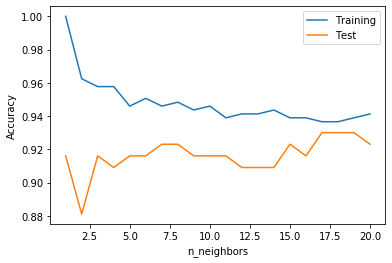

In [143]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state=0)

training_accurancy = []
test_accurancy = []


for n_neighbors in range(1,21):
    model = KNeighborsClassifier(n_neighbors=n_neighbors)
    model.fit(x_train,y_train)
    training_accurancy.append(model.score(x_train,y_train))
    test_accurancy.append(model.score(x_test,y_test))

plt.plot(range(1,21),training_accurancy,label='Training')
plt.plot(range(1,21),test_accurancy,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('n_neighbors')
plt.legend()


In [147]:
breast_cancer_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [148]:
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state = 0)

model = LinearSVC()
model.fit(x_train,y_train)

print (f"正解率:{model.score(x_train,y_train):.3f}")
print (f"正解率:{model.score(x_test,y_test):.3f}")

正解率:0.937
正解率:0.916


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [150]:
from sklearn.svm import LinearSVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state = 0)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)


model = LinearSVC()
model.fit(x_train_std,y_train)

print (f"正解率:{model.score(x_train_std,y_train):.3f}")
print (f"正解率:{model.score(x_test_std,y_test):.3f}")

正解率:0.993
正解率:0.951


In [154]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state = 0)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)


model = SVC(kernel='rbf',random_state = 0,C=2)
model.fit(x_train_std,y_train)

print (f"正解率:{model.score(x_train_std,y_train):.3f}")
print (f"正解率:{model.score(x_test_std,y_test):.3f}")

正解率:0.995
正解率:0.958


正解率:1.000
正解率:0.944


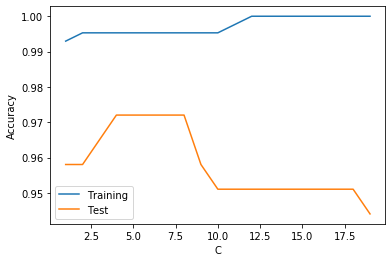

In [160]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


cancer = load_breast_cancer()

x_train,x_test,y_train,y_test = train_test_split(cancer.data,cancer.target,stratify=cancer.target,random_state = 0)

sc = StandardScaler()
sc.fit(x_train)
x_train_std = sc.transform(x_train)
x_test_std = sc.transform(x_test)

ary1 = []
ary2 = []
MAX_C = 20
for c in range(1,MAX_C):
    model = SVC(kernel='rbf',random_state = 0,C=c)
    model.fit(x_train_std,y_train)
    ary1.append(model.score(x_train_std,y_train))
    ary2.append(model.score(x_test_std,y_test))

plt.plot(range(1,MAX_C),ary1,label='Training')
plt.plot(range(1,MAX_C),ary2,label='Test')
plt.ylabel('Accuracy')
plt.xlabel('C')
#'Cross(交差)条件が高い（厳しい）とテストデータで正しく分類できない'
plt.legend()




print (f"正解率:{model.score(x_train_std,y_train):.3f}")
print (f"正解率:{model.score(x_test_std,y_test):.3f}")